In [2]:
# gdal 패키지 설치
from osgeo import gdal

In [3]:
# gdal version : 3.6.2 
gdal.__version__

'3.6.2'

In [8]:
# tif file load
filepath = 'D:\\windpath\\windpath\\12_sample\\'

ex_tif = gdal.Open(filepath + 'Landuse_000001.tif', gdal.GA_ReadOnly) # tif file load
print(ex_tif.GetMetadata())

{'AREA_OR_POINT': 'Area', 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)', 'TIFFTAG_SOFTWARE': 'IMAGINE TIFF Support\nCopyright 1991 - 1999 by ERDAS, Inc. All Rights Reserved\n@(#)$RCSfile: etif.c $ $Revision: 1.10.1.9.1.9.2.11 $ $Date: 2004/09/15 18:42:01EDT $', 'TIFFTAG_XRESOLUTION': '1', 'TIFFTAG_YRESOLUTION': '1'}


In [9]:
# 투영정보확인
ex_tif.GetProjection()

'PROJCS["GRS_1980_Transverse_Mercator",GEOGCS["GRS 1980",DATUM["GRS_1980",SPHEROID["GRS 1980",6378137,298.257222096042]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [10]:
# 밴드 개수?
ex_tif.RasterCount

1

In [11]:
# 밴드 데이터 보기
band = ex_tif.GetRasterBand(1)
values = band.ReadAsArray()
values.shape

(1201, 1501)

In [12]:
# 특정 band 평균, 표준편차 얻기
one = ex_tif.GetRasterBand(1)
one.ComputeBandStats()

(3.6876903047149803, 3.0390136341323517)

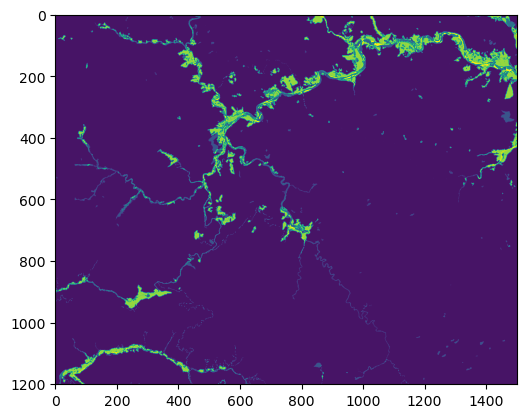

In [13]:
import matplotlib.pyplot as plt
plt.imshow(values)

In [14]:
# 3개의 층 쌓기
# Builing_000001.tif, Landuse_000001.tif, Terrain_000001.tif
building = gdal.Open(filepath + 'Building_000001.tif', gdal.GA_ReadOnly)
landuse = gdal.Open(filepath + 'Landuse_000001.tif', gdal.GA_ReadOnly)
terrain = gdal.Open(filepath + 'Terrain_000001.tif', gdal.GA_ReadOnly)

x_size = building.RasterXSize
y_size = building.RasterYSize
print(x_size, y_size)



3001 2401


In [15]:
projection = building.GetProjection()
projection

'PROJCS["Transverse Mercator",GEOGCS["GRS 1980",DATUM["GRS_1980",SPHEROID["GRS 1980",6378137,298.257222096042]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [16]:
driver = gdal.GetDriverByName('GTiff')
output = driver.Create('output.tif', x_size, y_size, 3, gdal.GDT_Float32)
output.SetProjection(projection)

0

In [17]:
# output에 band1, band2, band3 씌우기
band1 = building.GetRasterBand(1)
output.GetRasterBand(1).WriteArray(band1.ReadAsArray())

0

In [18]:
band2 = landuse.GetRasterBand(1)
output.GetRasterBand(2).WriteArray(band2.ReadAsArray())

band3 = terrain.GetRasterBand(1)
output.GetRasterBand(3).WriteArray(band3.ReadAsArray())

0

In [23]:
building = gdal.Open(filepath + 'Building_000001.tif', gdal.GA_ReadOnly)
landuse = gdal.Open(filepath + 'Landuse_000001.tif', gdal.GA_ReadOnly)
terrain = gdal.Open(filepath + 'Terrain_000001.tif', gdal.GA_ReadOnly)

def layer_tiff(im1, im2, im3):
    x_size = im1.RasterXSize
    y_size = im1.RasterYSize
    
    projection = building.GetProjection()
    
    driver = gdal.GetDriverByName('GTiff')
    output = driver.Create('output.tif', x_size, y_size, 3, gdal.GDT_Float32)
    output.SetProjection(projection)
    
    band1 = im1.GetRasterBand(1)
    output.GetRasterBand(1).WriteArray(band1.ReadAsArray())
    
    band2 = im2.GetRasterBand(1)
    output.GetRasterBand(2).WriteArray(band1.ReadAsArray())
    
    band3 = im3.GetRasterBand(1)
    output.GetRasterBand(3).WriteArray(band1.ReadAsArray())
    
    return output.ReadAsArray()
    
    

In [19]:
output.RasterCount # 3개의 layer가 쌓인 것을 확인할 수 있다

3

In [20]:
output.ReadAsArray().shape # 2401 * 3001 행렬이 3개의 층으로 쌓여있음

(3, 2401, 3001)

In [26]:
layer_tiff(building, landuse, terrain).shape

(3, 2401, 3001)